In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
df = pd.read_csv(r'C:\Users\User\Desktop\100days Machine Learning\train.csv')

In [166]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [167]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Here cabin has so many null values, so we are going to drop this column, remaining null column Age and Embarked

In [170]:
#dropping cabin column
df=df.drop(columns='Cabin')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Now Work with null column values

In [171]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [172]:
# fill up null values with mean and mode
mode_value = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_value, inplace=True)
mean_values = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_values)

In [173]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Here Age and Fare column is float type , let's conert it to integer and rounding Fare colimn

In [174]:
# here rounding converting float values into integer
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].round().astype(int)


In [175]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S


In [176]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.214366
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693352
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,8.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


In [177]:
df.duplicated().sum()

0

# Now EDA Univariant

### EDA with categorical column

In [178]:
print(df['Survived'].value_counts())

survived_counts = df['Survived'].value_counts()
trace = go.Bar(
    x = survived_counts.index, 
    y = survived_counts.values, 
    marker_color=['red', 'green'],  
    opacity=0.75
)
layout = go.Layout(
    title='Survival Counts',
    xaxis=dict(title='Survived'),
    yaxis=dict(title='Count')
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()



survived_counts = df['Survived'].value_counts()
trace = go.Pie(
    labels=survived_counts.index,
    values=survived_counts.values,
)
layout = go.Layout(
    title='Survival Counts',
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()


Survived
0    549
1    342
Name: count, dtype: int64


### EDA with Numerical data

In [179]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S


### histogram of age column

(array([ 30.,  20.,  18.,  15.,  81.,  83.,  90., 268.,  69.,  54.,  39.,
         35.,  32.,  18.,  13.,  13.,   6.,   5.,   1.,   1.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48.,
        52., 56., 60., 64., 68., 72., 76., 80.]),
 <BarContainer object of 20 artists>)

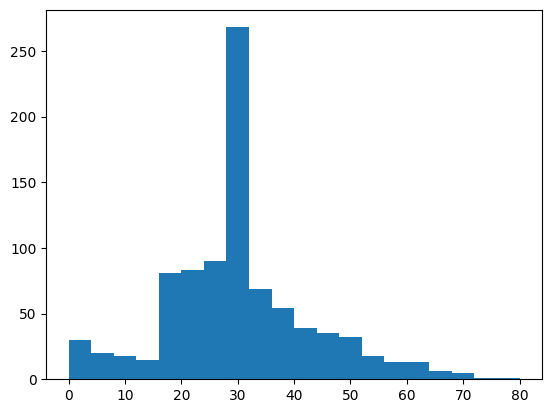

In [180]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=20)


### Distplot or KDEplot  in age coloumn

<Axes: xlabel='Age', ylabel='Density'>

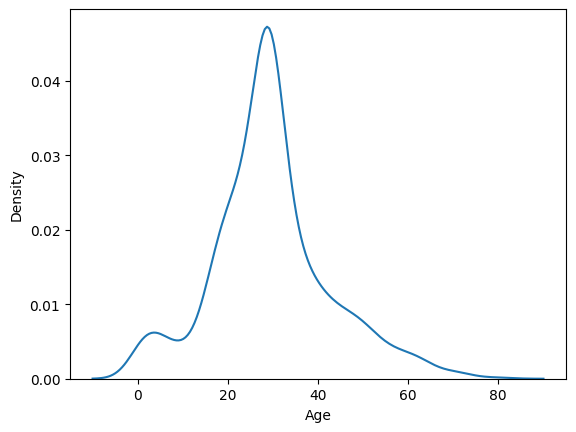

In [181]:
sns.kdeplot(df['Age'])

In [182]:
print('Total passenger = ',df['Age'].value_counts().sum())
import plotly.graph_objs as go
trace = go.Histogram(
    x = df['Age'],  
    marker_color=['green'],  
    opacity=0.75
)
layout = go.Layout(
    title='Age',
    xaxis=dict(title='Age'),
    yaxis=dict(title='Frequency')
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

Total passenger =  891


### Box plot with Age and fare column

<Axes: xlabel='Age'>

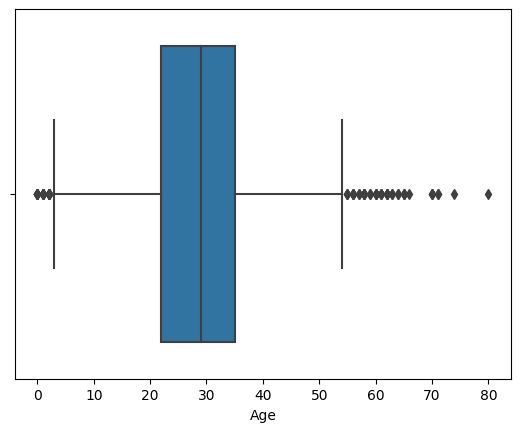

In [183]:
sns.boxplot(data=df,x='Age')

In [184]:
# box plot Age column
print('Median = ',df['Age'].median())

age_data = df['Age']
trace = go.Box(
    x = age_data,  
    marker_color='green',  
    opacity=0.75
)
layout = go.Layout(
    title='Age',
    xaxis=dict(title='Age'),
    yaxis=dict(title='Frequency')
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

Median =  29.0


In [185]:
# Box plot fare column
print('Median = ',df['Fare'].median())
print('Min = ',df['Fare'].min())
print('Max = ',df['Fare'].max())

age_data = df['Fare']
trace = go.Box(
    x = age_data,  
    marker_color='green',  
    opacity=0.75
)
layout = go.Layout(
    title='Ticket fare',
    xaxis=dict(title='Price'),
   
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

Median =  14.0
Min =  0
Max =  512
